<a href="https://colab.research.google.com/github/Chojit/ipea_documents/blob/main/IPEA_policy_documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
!pip install pypdf
!pip install pandas_gbq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
import pandas_gbq
drive.mount('/content/drive/')
texts_folder = '/content/drive/My Drive/Colaboração/Information from texts/Texts/'
main_folder = '/content/drive/My Drive/Colaboração/Information from texts/'

Mounted at /content/drive/


In [ ]:
import glob
import re
from pypdf import PdfReader

# Metada for documents

In [ ]:
ff = glob.glob(texts_folder+'*')

In [ ]:
glob.glob(main_folder+'*.xlsx')

['/content/drive/My Drive/Colaboração/Information from texts/Arquivo Sonoro_Relação de participantes de eventos_não deputados.xlsx',
 '/content/drive/My Drive/Colaboração/Information from texts/SUMMARY-references.xlsx',
 '/content/drive/My Drive/Colaboração/Information from texts/metadata_ciencia_e_tecnologia.xlsx']

In [ ]:
metadata = pd.read_excel('/content/drive/My Drive/Colaboração/Information from texts/metadata_ciencia_e_tecnologia.xlsx')


In [ ]:
filenames = metadata['NOME DO ARQUIVO:']
years = metadata['ANO']

In [ ]:
filenames

,NOME DO ARQUIVO:
0,NT_Politicas_industriais_China_Publicacao_Prel...
1,bapi_27_politica.pdf
2,NaN
3,td_2771.pdf
4,padrao_ouro_cap08.pdf
5,A_Politica_de_expansao_cap07.pdf
6,TD_2799_Web.pdf; td_catalogo_de_politicas_publ...
7,Outra_inovacao_e_possivel_cap09.pdf
8,NaN
9,Politica_Macroeconomicas_cap22.pdf


# Collect full texts

## List of files

In [ ]:
filepaths = []
years_docs = []
files_names = []
for k,f in enumerate(filenames):
  if type(f) == str and len(f)>0:
    fi = f.split('; ')
    for i in fi:
      ff = texts_folder+i
      filepaths.append(ff)
      files_names.append(ff.split('/')[-1])
      years_docs.append(years[k])

table_metadata = pd.DataFrame({'arquivo':filepaths,'ano':years_docs})
table_metadata['fileid'] = table_metadata.index

In [ ]:
pandas_gbq.to_gbq(table_metadata,
                  destination_table = 'projectdb_ipea_documents.metadata',project_id='insyspo',
                  if_exists = 'replace')

100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


## Full text from a file

In [ ]:
def full_text_file(filepath):
  reader = PdfReader(filepath)

  npages=len(reader.pages)

  full_text = ''
  for i in range(npages):
    page = reader.pages[i]
    text = page.extract_text()
    full_text += text

  return full_text

In [ ]:
full_text = full_text_file(filepaths[17])
print(filepaths[17])
print(len(full_text))

/content/drive/My Drive/Colaboração/Information from texts/Texts/ppp_n57.pdf
757725


In [ ]:
full_text[:115]

'jan.\nmar. \n2021 57\nIMPACTOS SOCIOECONÔMICOS DA EXPANSÃO DA INDÚSTRIA NAVAL NO SUL \nDO RIO GRANDE DO SUL\nMaicker Lei'

In [ ]:
full_text

"jan.\nmar. \n2021 57\nIMPACTOS SOCIOECONÔMICOS DA EXPANSÃO DA INDÚSTRIA NAVAL NO SUL \nDO RIO GRANDE DO SUL\nMaicker Leite Bartz\nVinícius Halmenschlager\nGibran da Silva Teixeira\nEDUCAÇÃO NO ESTADO DO CEARÁ: ANÁLISES UTILIZANDO O MÉTODO \nDO CONTROLE SINTÉTICO\nNatanael Soares Leite\nFrancisco Germano Carvalho Lucio\nO IMPACTO DAS TECNOLOGIAS SOCIAIS SOBRE A GERAÇÃO DE EMPREGO E RENDA, \nE A SUSTENTABILIDADE AMBIENTAL DO PEQUENO AGRICULTOR DO SEMIÁRIDO CEARENSE\nMaria Josiell Nascimento da Silva\nAhmad Saeed Khan\nEdward Martins Costa\nDomingos Isaias Maia Amorim\nFrancisco José Silva Tabosa\nPOLÍTICAS PÚBLICAS PARA MAIOR EFICÁCIA E CONFORMIDADE DA \nADMINISTRAÇÃO TRIBUTÁRIA ESTADUAL: UM ESTUDO DE CASO\nEduardo Almeida Mota\nLuciano Quinto Lanz\nPARTICIPAÇÃO E ATIVISMO DO GRUPO DE INTERESSE DA SEGURANÇA \nALIMENTAR E NUTRICIONAL EM SÃO PAULO/SP\nSilvana Maria Ribeiro\nCláudia Maria Bógus\nDETERMINANTES DA FELICIDADE: UM ESTUDO COMPARATIVO \nENTRE O SUDESTE E O NORDESTE BRASILEIRO\nD

# Find references

In [ ]:
def find_references(full_text):
  # Mark beginning and end of references list
  mrefs = re.search("\n\s*[0-9\.]{0,6}\s*R[E|e][F|f][E|e][R|r][Ê|ê|E|e][N|n][C|c][I|i][A|a][S|s].{0,18}\s*\n",full_text)
  mbiblio = re.search("\n\s*[0-9\.]{0,6}\s*B[I|i][B|b][L|l][I|i][O|o][G|g][R|r][A|a][F|f].{0,18}\s*\n",full_text)
  mcredits = re.search("\n\s*Missão do Ipea{0,18}\s*\n",full_text)
  meditorial = re.search("\n\s*[0-9\.]{0,6}\s*E[D|d][I|i][T|t][O|o][R|r][I|i][A|a][L|l].{0,18}\s*\n",full_text)
  mcapitulo =  re.search("\n\s*[0-9\.]{0,6}\s*Aprovação final em\:",full_text)
  mapendice =  re.search("\n\s*[0-9\.]{0,6}\s*A[P|p][Ê|ê][N|n][D|d][I|i][C|c][E|e]",full_text)

  if mrefs != None and mapendice != None:
    start_refs = mrefs.span()[1]
    end_refs = mapendice.span()[0]
  elif mrefs != None and mcapitulo != None:
    start_refs = mrefs.span()[1]
    end_refs = mcapitulo.span()[0]
  elif mrefs != None and mbiblio != None:
    start_refs = mrefs.span()[1]
    end_refs = mbiblio.span()[0]
  elif mrefs != None and meditorial != None:
    if meditorial.span()[0] > mrefs.span()[1]:
      start_refs = mrefs.span()[1]
      end_refs = meditorial.span()[0]
    else:
      start_refs = mrefs.span()[1]
      end_refs = len(full_text)
  elif mrefs != None and mbiblio == None and mcredits != None:
    if mcredits.span()[0] > mrefs.span()[1]:
      start_refs = mrefs.span()[1]
      end_refs = mcredits.span()[0]
    else:
      start_refs = mrefs.span()[1]
      end_refs = len(full_text)
  elif mrefs != None and mbiblio == None and mcredits == None:
    start_refs = mrefs.span()[1]
    end_refs = len(full_text)
  elif mrefs == None and mbiblio != None and mcredits != None:
    start_refs = mbiblio.span()[1]
    end_refs = mcredits.span()[0]
  elif mrefs == None and mbiblio != None and mcredits == None:
    start_refs = mbiblio.span()[1]
    end_refs = len(full_text)

  return start_refs, end_refs

In [ ]:
def find_references_(full_text):
  # Mark beginning and end of references lists considering several portions of references,
  # such as in a book.

  start_refs_ = []
  end_refs_ = []
  mrefs = re.finditer("\n\s*[0-9\.]{0,6}\s*R[E|e][F|f][E|e][R|r][Ê|ê|E|e][N|n][C|c][I|i][A|a][S|s].{0,18}\s*\n",full_text)
  for mr in mrefs:
    start_refs = mr.span()[1]
    mbiblio = re.search("\n\s*[0-9\.]{0,6}\s*B[I|i][B|b][L|l][I|i][O|o][G|g][R|r][A|a][F|f].{0,18}\s*\n",full_text[start_refs:])
    mcredits = re.search("\n\s*Missão do Ipea{0,18}\s*\n",full_text[start_refs:])
    meditorial = re.search("\n\s*[0-9\.]{0,6}\s*E[D|d][I|i][T|t][O|o][R|r][I|i][A|a][L|l].{0,18}\s*\n",full_text[start_refs:])
    mcapitulo =  re.search("\n\s*[0-9\.]{0,6}\s*Aprovação final em\:",full_text[start_refs:])
    mapendice =  re.search("\n\s*[0-9\.]{0,6}\s*A[P|p][Ê|ê][N|n][D|d][I|i][C|c][E|e]",full_text[start_refs:])

    if mapendice != None:
      end_refs = mapendice.span()[0]+start_refs
    elif mcapitulo != None:
      end_refs = mcapitulo.span()[0]+start_refs
    elif mbiblio != None:
      end_refs = mbiblio.span()[0]+start_refs
    elif meditorial != None:
      end_refs = meditorial.span()[0]+start_refs
    elif mbiblio == None and mcredits != None:
        end_refs = mcredits.span()[0]+start_refs
    elif mbiblio == None and mcredits == None:
      end_refs = len(full_text)
    elif mbiblio != None and mcredits != None:
      end_refs = mcredits.span()[0]+start_refs
    elif mbiblio != None and mcredits == None:
      end_refs = len(full_text)
    else:
      end_refs = len(full_text)

    start_refs_.append(start_refs)
    end_refs_.append(end_refs)

  return start_refs_, end_refs_

In [ ]:
start_refs, end_refs = find_references_(full_text)

# Split references

In [ ]:
# Region of references
refs = full_text[start_refs:end_refs]

refs_items = re.split('\n(\s*[A-Z|__]{3,})',refs)
refs_items_ = [refs_items[0]]
for a,b in zip(refs_items[1::2],refs_items[2::2]):
  refs_items_ += [a+b]

In [ ]:
# Region of references
refs = full_text[start_refs:end_refs]

refs_items = re.split('\n(\s*[A-Z|__]{3,})',refs)
refs_items_ = [refs_items[0]]
for a,b in zip(refs_items[1::2],refs_items[2::2]):
  refs_items_ += [a+b]
refs_items = [r for r in refs_items_ if len(r)>2]

corrected_refs_items = []
nyear_prev = 1
for i,r in enumerate(refs_items):
  v = re.findall('\s([1|2][0-9]{3})[^0-9^\-]',r)
  nyear = len(v)
  #print(nyear)
  if nyear_prev == 0:
    corrected_refs_items.append(refs_items[i-1]+refs_items[i])
  elif nyear != 0:
    corrected_refs_items.append(r)

  nyear_prev = nyear

print(corrected_refs_items)

In [ ]:
def split_references(full_text,start_refs,end_refs):
  # Region of references
  refs = full_text[start_refs:end_refs]

  refs_items = re.split('\n(\s*[A-Z|__]{3,})',refs)
  refs_items_ = [refs_items[0]]
  for a,b in zip(refs_items[1::2],refs_items[2::2]):
    refs_items_ += [a+b]
  refs_items = [r for r in refs_items_ if len(r)>2]

  corrected_refs_items = []
  nyear_prev = 1
  for i,r in enumerate(refs_items):
    v = re.findall('\s([1|2][0-9]{3})[^0-9^\-]',r)
    nyear = len(v)
    #print(nyear)
    if nyear_prev == 0:
      corrected_refs_items.append(refs_items[i-1]+refs_items[i])
    elif nyear != 0:
      corrected_refs_items.append(r)

    nyear_prev = nyear

  return corrected_refs_items

## Search for references

## Collect clues

### Surname of first author

In [ ]:
def collect_surname_authors(ref):
  authors = [r.split('.')[0].split(',')[0].strip().split(' ')[0].lower().strip() for r in refs]
  for i,a in enumerate(authors):
    if '__' in a:
      authors[i] = authors[i-1]

  return authors

### DOI

In [ ]:
def collect_dois(refs):
  dois = []
  for r in refs:
    v = re.findall('\b(10[.][0-9]{4,}(?:[.][0-9]+)*\/(?:(?!["&\'<>])\S)+)\b',r)
    if len(v)>0:
      dois += [v]
    else:
      dois += ['']

  return dois

### Publication year

In [ ]:
def collect_years(refs):
  years = []
  for r in refs:
    v = re.findall('\s([1|2][0-9]{3})[^0-9^\-]',r+'.')
    #print(r,'___',v)
    if len(v) >0:
      years += [v[-1]]
    else:
      years += ['']

  return years

### Find title

In [ ]:
def collect_title_keys(refs):
  mk1 = []
  mk2 = []
  mk3 = []
  for r in refs:
    pieces = r.split('.')
    pieces = [re.sub('[^a-zA-Záàãóõéêçíú]','',p).lower() for p in pieces]
    pieces.sort(key=len)

    try:
      mk1 += [pieces[-1]]
      if len(pieces)>1:
        mk2 += [pieces[-2]]
      else:
        mk2 += ['']
      if len(pieces)>2:
        mk3 += [pieces[-3]]
      else:
        mk3 += ['']
    except:
     print(pieces)
  return mk1, mk2, mk3

### Collect on a file

In [ ]:
dois = collect_dois(refs)
years = collect_years(refs)
authors = collect_surname_authors(refs)
mk1, mk2, mk3 = collect_title_keys(refs)
clues = pd.DataFrame({'doi':dois,'year':years,'first_author':authors,'title_key1':mk1,'title_key2':mk2,'title_key3':mk3})

In [ ]:
def combine_references(full_text, start_refs_, end_refs_):
  Refs = []
  for s,e in zip(start_refs_, end_refs_):
    refs = split_references(full_text,s,e)
    Refs += refs

  return Refs

# Process files

In [ ]:
table_metadata

,arquivo,ano,fileid
0,/content/drive/My Drive/Colaboração/Informatio...,2021,0
1,/content/drive/My Drive/Colaboração/Informatio...,2021,1
2,/content/drive/My Drive/Colaboração/Informatio...,2021,2
3,/content/drive/My Drive/Colaboração/Informatio...,2022,3
4,/content/drive/My Drive/Colaboração/Informatio...,2022,4
...,...,...,...
63,/content/drive/My Drive/Colaboração/Informatio...,2023,63
64,/content/drive/My Drive/Colaboração/Informatio...,2023,64
65,/content/drive/My Drive/Colaboração/Informatio...,2023,65
66,/content/drive/My Drive/Colaboração/Informatio...,2023,66


In [ ]:
Clues = pd.DataFrame({'doi':[],'year':[],'first_author':[],
                      'title_key1':[],'title_key2':[],'title_key3':[],
                     'fileid':[],'year_doc':[]})

filepaths_ = table_metadata['arquivo']
years_docs = table_metadata['ano']
fileids = table_metadata['fileid']
errors = []
for fileid,ff,ano_doc in zip(fileids,filepaths_,years_docs):
  try:
    full_text = full_text_file(ff)
    start_refs_, end_refs_ = find_references_(full_text)
    refs = combine_references(full_text,start_refs_,end_refs_)
    if(len(refs))==0:
      print('File without references:',ff)
    dois = collect_dois(refs)
    years = collect_years(refs)
    authors = collect_surname_authors(refs)
    mk1, mk2, mk3 = collect_title_keys(refs)
    clues = pd.DataFrame({'file':[ff]*len(dois),'doi':dois,'year':years,
                          'first_author':authors,
                          'title_key1':mk1,
                          'title_key2':mk2,
                          'title_key3':mk3,
                          'fileid':fileid,
                          'year_doc':ano_doc})
    Clues = pd.concat((Clues,clues),axis=0)
  except:
    print('Error!')
    errors.append(ff)

T = pd.DataFrame({'error_file':errors})
T.to_csv(main_folder+'error_references.txt')

File without references: /content/drive/My Drive/Colaboração/Information from texts/Texts/td_analise_ex_ante_guia_metodologica_publicacao_preliminar.pdf


In [ ]:
pandas_gbq.to_gbq(Clues,'projectdb_ipea_documents.references',
                  project_id = 'insyspo',if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 7810.62it/s]


# Search on OpenAlex

## Table of all surnames

In [ ]:
%%bigquery --project=insyspo

CREATE OR REPLACE TABLE `insyspo.projectdb_ipea_documents.openalex_surnames` AS (
  SELECT author_id,LOWER(SPLIT(display_name_alternative,' ')[ARRAY_LENGTH(SPLIT(display_name_alternative,' '))-1]) AS surname
  FROM `insyspo.publicdb_openalex_2024_04_rm.authors_display_name_alternatives`
);

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=insyspo

CREATE OR REPLACE TABLE `insyspo.projectdb_ipea_documents.match_surnames` AS (
  SELECT b.author_id, b.surname
  FROM `insyspo.projectdb_ipea_documents.references` AS a
  JOIN `insyspo.projectdb_ipea_documents.openalex_surnames` AS b
  ON a.first_author = b.surname
);

Query is running:   0%|          |

""


## Authorships of found surnames

In [ ]:
%%bigquery --project=insyspo

CREATE OR REPLACE TABLE `insyspo.projectdb_ipea_documents.authorships` AS (
  SELECT b.author_id, b.work_id, b.institution_id, a.surname
  FROM `insyspo.projectdb_ipea_documents.match_surnames` AS a
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works_authorships` AS b
  ON a.author_id = b.author_id
  WHERE b.author_order = 1
);

Query is running:   0%|          |

""


## Filter authorships found by year

In [ ]:
%%bigquery --project=insyspo

CREATE OR REPLACE TABLE `insyspo.projectdb_ipea_documents.authorships_year` AS (
  SELECT a.*, b.publication_year
  FROM `insyspo.projectdb_ipea_documents.authorships` AS a
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works` AS b
  ON a.work_id = b.id
  JOIN `insyspo.projectdb_ipea_documents.references` AS c
  ON a.surname = c.first_author
  WHERE c.year IS NOT NULL AND c.year != '' AND b.publication_year = CAST(c.year AS INT64)
);

Query is running:   0%|          |

""


## Use work ids to collect all the clues from OpenAlex

In [ ]:
%%bigquery --project=insyspo

CREATE OR REPLACE TABLE projectdb_ipea_documents.openalex_clues AS (
  SELECT a.work_id,
    a.surname,
    b.display_name,
    LOWER(REGEXP_REPLACE(b.display_name,'[^a-zA-Záàãóõéêçíú]','')) AS title_clean,
    b.publication_year,
    LOWER(REGEXP_REPLACE(s.display_name,'[^a-zA-Záàãóõéêçíú]','')) AS source_clean,
    b.doi
  FROM (
    SELECT work_id, surname
    FROM `insyspo.projectdb_ipea_documents.authorships_year`
    GROUP BY work_id, surname
  ) AS a
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works` AS b
  ON a.work_id = b.id
  LEFT JOIN `insyspo.publicdb_openalex_2024_04_rm.works_locations` AS wl
  ON b.id = wl.work_id
  LEFT JOIN `insyspo.publicdb_openalex_2024_04_rm.sources` AS s
  ON wl.source_id = s.id
)

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=insyspo

CREATE OR REPLACE TABLE projectdb_ipea_documents.matches AS (
  SELECT a.work_id, a.doi, b.file
  FROM projectdb_ipea_documents.openalex_clues AS a
  JOIN projectdb_ipea_documents.references AS b
  ON a.title_clean = b.title_key1
  WHERE LENGTH(a.title_clean) > 4
  GROUP BY a.work_id, a.doi, b.file
  UNION ALL
  SELECT a.work_id, a.doi, b.file
  FROM projectdb_ipea_documents.openalex_clues AS a
  JOIN projectdb_ipea_documents.references AS b
  ON a.title_clean = b.title_key2
  WHERE LENGTH(a.title_clean) > 8
  GROUP BY a.work_id, a.doi, b.file
  UNION ALL
  SELECT a.work_id, a.doi, b.file
  FROM projectdb_ipea_documents.openalex_clues AS a
  JOIN projectdb_ipea_documents.references AS b
  ON a.title_clean = b.title_key3
  WHERE LENGTH(a.title_clean) > 16
  GROUP BY a.work_id, a.doi, b.file
)

Query is running:   0%|          |

""


# Find citations in the text

In [ ]:
body = full_text[:start_refs]

In [ ]:
v = re.findall('\([^0-9\)\(]*?[0-9]{4}\)[^0-9]*?',body)

In [ ]:
refre = re.compile('\([^0-9\)\(]*?[0-9]{4}\)[^0-9]*?')
v = refre.finditer(body)
for vi in v:
  ss = vi.span()
  print(ss[0],ss[1])

2138 2152
2719 2733
3784 3798
4694 4708
6727 6764
7913 7952
10185 10209
10218 10224
11081 11087
11338 11344
11702 11708
12815 12850
12930 12936
12962 12968
13138 13144
13439 13445
13865 13871
16338 16352
17320 17334
18360 18374
55310 55316


## Split sentences

In [ ]:
def split_sentences(body):
  body = body.replace('et al.','et al')
  sentre = re.compile('\.\s*?')
  sentences = sentre.split(body)
  sentences = [s for s in sentences if len(s)>10]

  return sentences

## Select sentences with citations

In [ ]:
def select_citing_sentences(sentences):
  refre = re.compile('\([^0-9\)\(]*?[0-9]{4}\)[^0-9]*?')
  sents_refs = []
  refs_sents = []
  ids = []
  for j,s in enumerate(sentences):
    v = refre.search(s)
    if v != None:
      sents_refs.append(s)
      refs_sents.append(v)
      ids += [j]

  return sents_refs, ids

In [ ]:
def select_window_sentences(sentences):
  refre = re.compile('\([^0-9\)\(]*?[0-9]{4}\)[^0-9]*?')
  sents_refs = []
  refs_sents = []
  for i,s in enumerate(sentences):
    v = refre.search(s)
    if v != None:
      sents_refs.append(sentences[i-1]+'. '+s+'. '+sentences[i+1])
      refs_sents.append(v)

  return sents_refs

# Process several files

In [ ]:
table_metadata.head()

,arquivo,ano,fileid
0,/content/drive/My Drive/Colaboração/Informatio...,2021,0
1,/content/drive/My Drive/Colaboração/Informatio...,2021,1
2,/content/drive/My Drive/Colaboração/Informatio...,2021,2
3,/content/drive/My Drive/Colaboração/Informatio...,2022,3
4,/content/drive/My Drive/Colaboração/Informatio...,2022,4


In [ ]:
all_sentences = []
all_citing_sentences = []
files = []
files_all = []
id_file = 0
id_sentences = []
id_citing_sentences = []
id_files = []
id_files_citing = []
id_citing_in_all = []
filepaths = table_metadata['arquivo']
year_doc = table_metadata['ano']
fileid = table_metadata['fileid']
fids = []
fids_cit = []
for fp,yc,fid in zip(filepaths,year_doc,fileid):
  try:
    full_text = full_text_file(fp)
    start_refs, end_refs = find_references(full_text)
    body = full_text[:start_refs]
    sentences = split_sentences(body)
    sents_refs, id_citing = select_citing_sentences(sentences)
    all_citing_sentences += sents_refs
    all_sentences += sentences
    files += [fp]*(len(sents_refs))
    files_all += [fp]*(len(sentences))
    id_sentences += list(range(len(sentences)))
    id_citing_sentences += list(range(len(sents_refs)))
    id_citing_in_all += id_citing
    id_files += [id_file]*len(sentences)
    id_files_citing += [id_file]*len(sents_refs)
    id_file +=1
    fids_cit += [fid]*(len(sents_refs))
    fids += [fid]*(len(sentences))
  except Exception as e:
    print(fp,'\n',e)

/content/drive/My Drive/Colaboração/Information from texts/Texts/td_analise_ex_ante_guia_metodologica_publicacao_preliminar.pdf 
 local variable 'start_refs' referenced before assignment


In [ ]:
print(len(all_citing_sentences),len(all_sentences),len(id_citing_sentences),len(id_citing_in_all))

2267 27950 2267 2267


In [ ]:
T_all_sentences = pd.DataFrame({'id_file':id_files,'id_sentence':id_sentences,
                                'file':files_all,'sentence': all_sentences,
                                'fid':fids})
T_citing_sentences = pd.DataFrame({'id_file':id_files_citing,
                                   'id_citing_in_all': id_citing_in_all,
                                   'id_citing_sentence':id_citing_sentences,
                                   'file':files,'sentence': all_citing_sentences,
                                    'fid':fids_cit})
T_citing_sentences.to_parquet(main_folder+'citing_sentences.parquet')
T_all_sentences.to_parquet(main_folder+'all_sentences.parquet')

In [ ]:
T_citing_sentences.head()

,id_file,id_citing_in_all,id_citing_sentence,file,sentence,fid
0,0,45,0,/content/drive/My Drive/Colaboração/Informatio...,"De uma forma geral, os novos processos de pro...",0
1,0,52,1,/content/drive/My Drive/Colaboração/Informatio...,Ainda de acordo com a Organization \nfor Econ...,0
2,0,59,2,/content/drive/My Drive/Colaboração/Informatio...,\n ...,0
3,0,64,3,/content/drive/My Drive/Colaboração/Informatio...,O relatório \nda OECD de 2016 incluía como te...,0
4,0,69,4,/content/drive/My Drive/Colaboração/Informatio...,"(Wübbeke et al, 2016)",0


# Steps

- Separate list of references. Beginning and ending.
- Separate text in list of sentences.
- Write code to find references in the text -- select sentence and paragraph.
  - Collect last names of authors in cleaned version (lower and special characters).
  - Match list of surnames plus year to text.
- Table match sentences in text to references.

# Conceptual steps

- Categories of citations.
- Examples of citations in each category

In [ ]:
T_citing_sentences = pd.read_parquet(main_folder+'citing_sentences.parquet')
T_all_sentences = pd.read_parquet(main_folder+'all_sentences.parquet')

In [ ]:
T_all_sentences

,id_file,id_sentence,file,sentence
0,0,0,/content/drive/My Drive/Colaboração/Informatio...,\n \n \n \n \n \n \n \n \n \nPOLÍTICAS INDUS...
1,0,1,/content/drive/My Drive/Colaboração/Informatio...,\n \nPublicação \nPreliminar \nPOLÍTICAS IN...
2,0,2,/content/drive/My Drive/Colaboração/Informatio...,"Nesse sentido, foi dada ênfase às principais ..."
3,0,3,/content/drive/My Drive/Colaboração/Informatio...,"Portanto, o objetivo é não \napenas tornar ca..."
4,0,4,/content/drive/My Drive/Colaboração/Informatio...,"\nPalavras Chave: Inovação tecnológica, Indú..."
...,...,...,...,...
27945,66,506,/content/drive/My Drive/Colaboração/Informatio...,"\nMesmo o crescimento dos outros clusters, co..."
27946,66,507,/content/drive/My Drive/Colaboração/Informatio...,"\nNo entanto, conforme ressaltado por van Dijc..."
27947,66,508,/content/drive/My Drive/Colaboração/Informatio...,"Portanto, seu envolvimento vai além de ape-\n..."
27948,66,509,/content/drive/My Drive/Colaboração/Informatio...,Compreender como o \nEstado pode alavancar os...


In [ ]:
T_citing_sentences

,id_file,id_citing_in_all,id_citing_sentence,file,sentence
0,0,45,0,/content/drive/My Drive/Colaboração/Informatio...,"De uma forma geral, os novos processos de pro..."
1,0,52,1,/content/drive/My Drive/Colaboração/Informatio...,Ainda de acordo com a Organization \nfor Econ...
2,0,59,2,/content/drive/My Drive/Colaboração/Informatio...,\n ...
3,0,64,3,/content/drive/My Drive/Colaboração/Informatio...,O relatório \nda OECD de 2016 incluía como te...
4,0,69,4,/content/drive/My Drive/Colaboração/Informatio...,"(Wübbeke et al, 2016)"
...,...,...,...,...,...
2262,66,480,87,/content/drive/My Drive/Colaboração/Informatio...,\nEspecificamente em relação às ciências econô...
2263,66,487,88,/content/drive/My Drive/Colaboração/Informatio...,"(2019), são resumidas a seguir"
2264,66,490,89,/content/drive/My Drive/Colaboração/Informatio...,"\nAdemais, conforme apontam Cutolo e Kenney (2..."
2265,66,495,90,/content/drive/My Drive/Colaboração/Informatio...,"Há temas de pesquisa importantes em aberto, a..."


# Bibliometric Analysis

## Topics distribution

In [ ]:
%%bigquery matches --project=insyspo

SELECT DISTINCT a.work_id,
  c.display_name AS topic,
  d.display_name AS subfield
FROM `insyspo.projectdb_ipea_documents.matches` AS a
JOIN `insyspo.publicdb_openalex_2024_10_rm.works_topics` AS b
ON a.work_id = b.work_id
JOIN `insyspo.publicdb_openalex_2024_10_rm.topics` AS c
ON c.id = b.topic_id
JOIN `insyspo.publicdb_openalex_2024_10_rm.subfields` AS d
ON c.subfield = d.id
WHERE b.score>0.97

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
matches.subfield.value_counts()

,count
subfield,
Economics and Econometrics,246
Sociology and Political Science,142
Political Science and International Relations,72
"General Economics, Econometrics and Finance",68
General Health Professions,66
...,...
Hematology,1
Ecology,1
Epidemiology,1


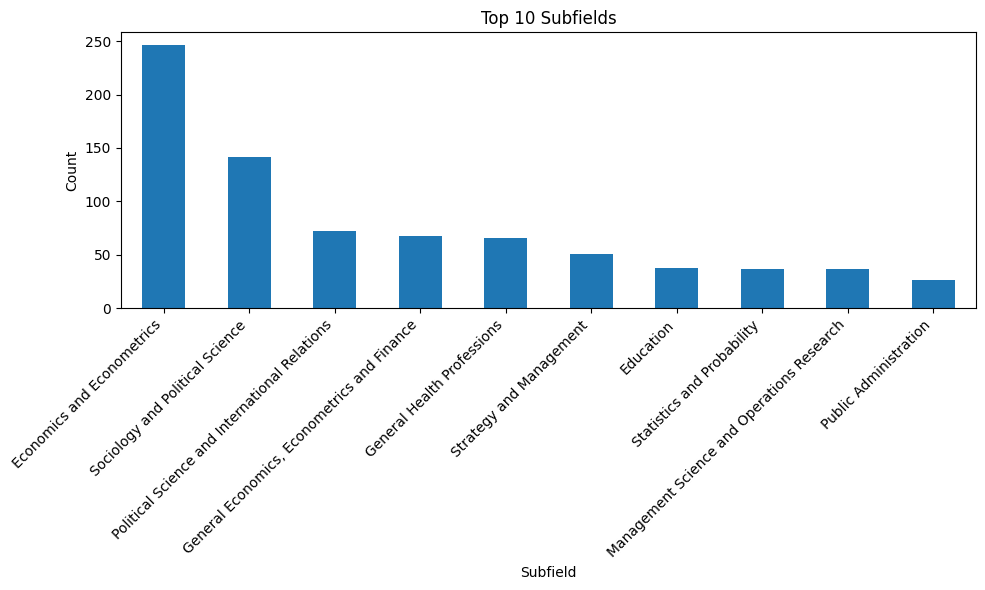

In [ ]:
import matplotlib.pyplot as plt

top_10_subfields = matches['subfield'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_subfields.plot(kind='bar')
plt.title('Top 10 Subfields')
plt.xlabel('Subfield')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Publication Year

In [ ]:
%%bigquery pub_year --project=insyspo

SELECT DISTINCT a.work_id,
  b.publication_year
FROM `insyspo.projectdb_ipea_documents.matches` AS a
JOIN `insyspo.publicdb_openalex_2024_10_rm.works` AS b
ON a.work_id = b.id

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
pub_year

,work_id,publication_year
0,3122470732,2013
1,3124425329,2013
2,2167960508,2006
3,1569924848,1974
4,2131711668,2002
...,...,...
675,3123101550,2013
676,1968371014,1989
677,1998118359,1995
678,3122812581,2011


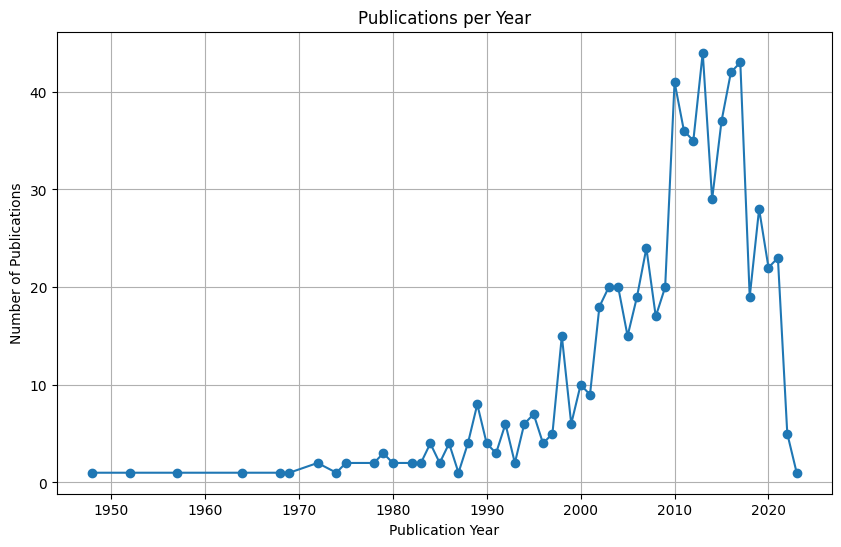

In [ ]:
year_counts = pub_year.publication_year.value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')
plt.xlabel("Publication Year")
plt.ylabel("Number of Publications")
plt.title("Publications per Year")
plt.grid(True)
plt.show()

## Countries and Institutions

In [ ]:
%%bigquery authorships --project=insyspo

SELECT DISTINCT a.work_id,
  b.author_position,
  b.author_id,
  b.institution_id,
  c.type AS institution_type,
  c.display_name AS institution_name,
  c.country AS institution_country
FROM `insyspo.projectdb_ipea_documents.matches` AS a
JOIN `insyspo.publicdb_openalex_2024_10_rm.works_authorships` AS b
ON a.work_id = b.work_id
JOIN `insyspo.publicdb_openalex_2024_10_rm.institutions` AS c
ON b.institution_id = c.id

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
authorships

,work_id,author_position,author_id,institution_id,institution_type,institution_name,institution_country
0,2151887920,first,5001427381,1321305853,nonprofit,National Bureau of Economic Research,United States
1,2043099181,last,5058726534,197518295,nonprofit,IZA - Institute of Labor Economics,Germany
2,4293374230,last,5073699535,181391015,education,Universidade Estadual de Campinas (UNICAMP),Brazil
3,1975855420,middle,5087483205,1334329717,other,World Bank,United States
4,2145542433,middle,5008302723,1317239608,other,Federal Reserve,United States
...,...,...,...,...,...,...,...
1940,4283028875,middle,5041218821,20581793,education,University of Kent,United Kingdom
1941,2749282912,middle,5000200467,4210144876,education,Duke University Health System,United States
1942,3122844462,first,5058726534,19645662,nonprofit,American Bar Foundation,United States
1943,2116639139,middle,5048035662,10824318,education,Universidade Federal de Ouro Preto,Brazil


In [ ]:
authorships['authorships'] = authorships['work_id'].astype(str) + '_' + authorships['author_id'].astype(str)

In [ ]:
authorships['authorships'].nunique()

1534

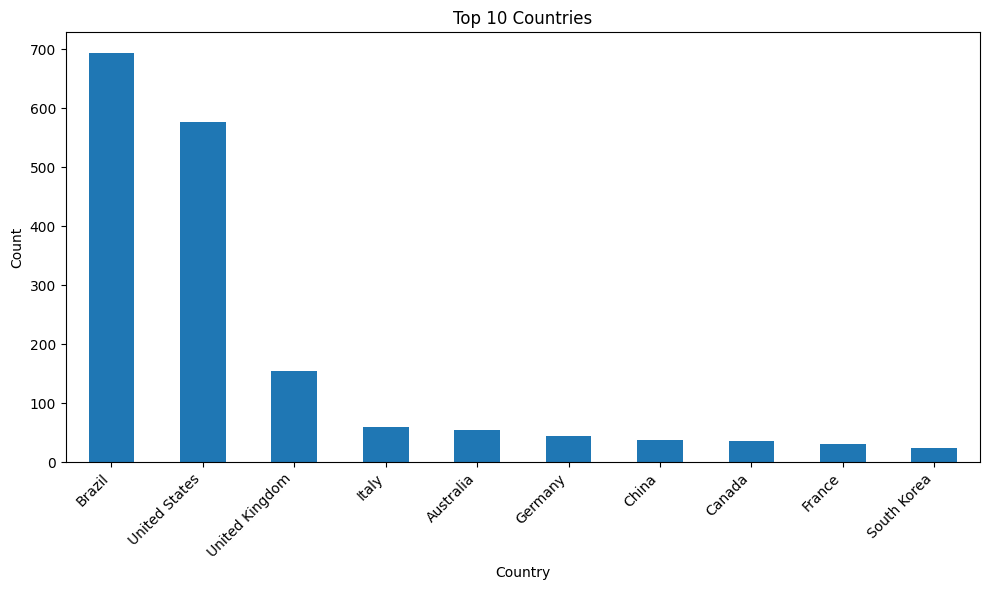

In [ ]:
top_10_country = authorships['institution_country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_country.plot(kind='bar')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

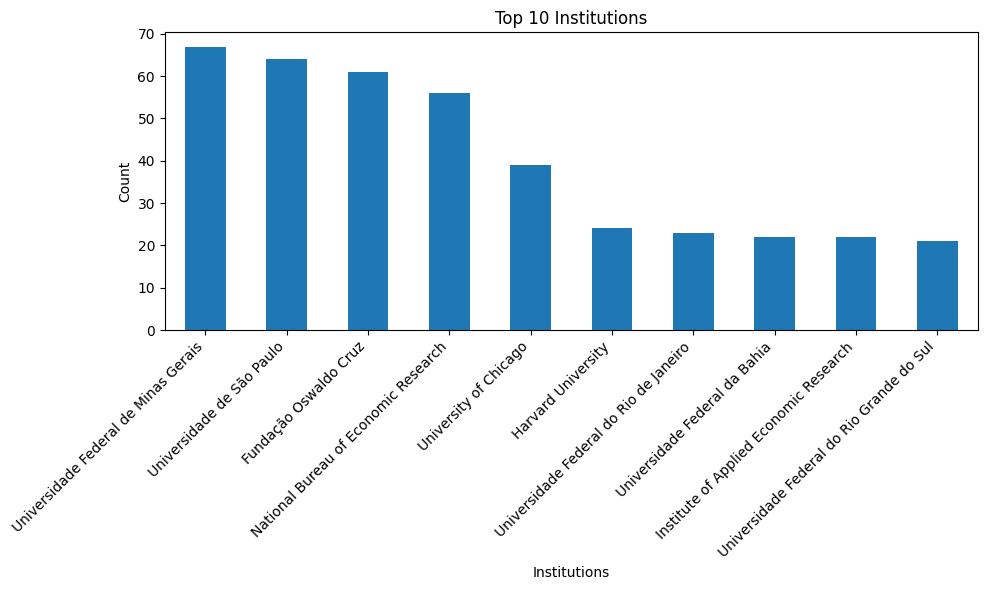

In [ ]:
top_10_institution_name = authorships['institution_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_institution_name.plot(kind='bar')
plt.title('Top 10 Institutions')
plt.xlabel('Institutions')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

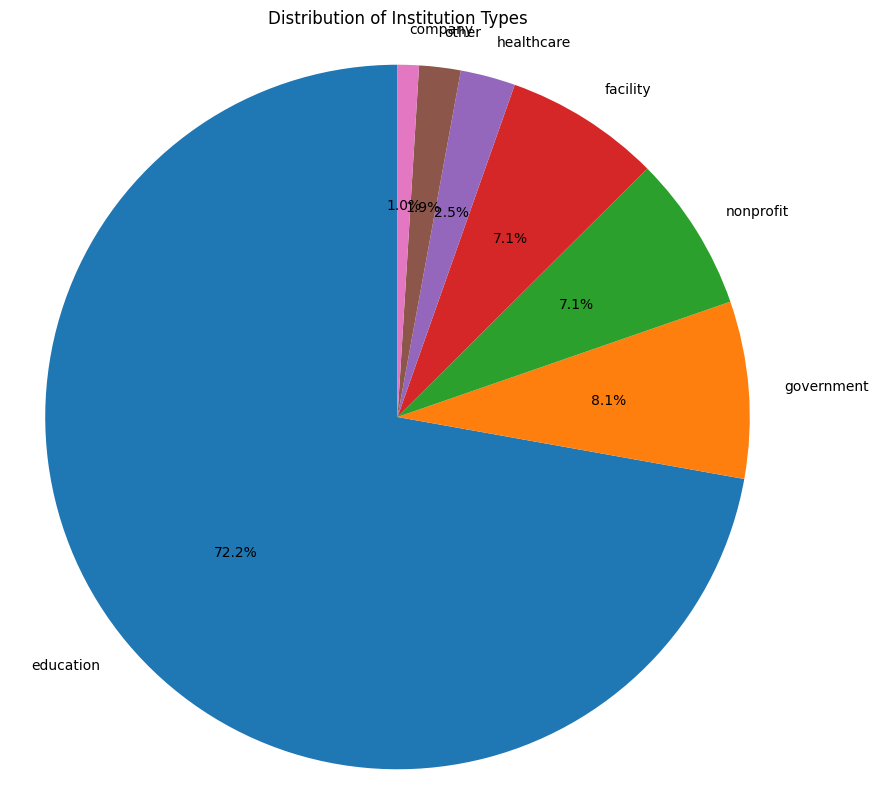

In [ ]:
institution_types = authorships['institution_type'].value_counts()


plt.figure(figsize=(10, 10))  # Adjust figure size as needed
institution_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Institution Types')
plt.ylabel('')  # Hide the y-label
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

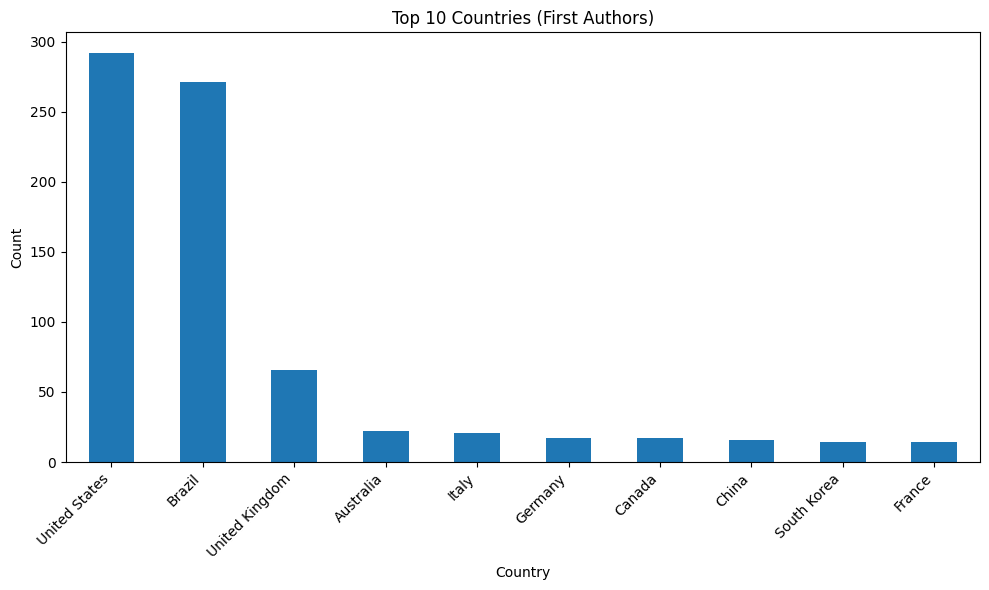

In [ ]:
first_authors = authorships[authorships['author_position'] == 'first']

top_10_country_first_author = first_authors['institution_country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_country_first_author.plot(kind='bar')
plt.title('Top 10 Countries (First Authors)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_10_country_first_author

,count
institution_country,
United States,292
Brazil,271
United Kingdom,66
Australia,22
Italy,21
Germany,17
Canada,17
China,16
South Korea,14


In [ ]:
first_authors.authorships.nunique()

667

In [ ]:
first_authors

,work_id,author_position,author_id,institution_id,institution_type,institution_name,institution_country,authorships
0,2151887920,first,5001427381,1321305853,nonprofit,National Bureau of Economic Research,United States,2151887920_5001427381
7,3144155140,first,5036192906,1321305853,nonprofit,National Bureau of Economic Research,United States,3144155140_5036192906
8,163651643,first,5077000255,193775966,education,Yonsei University,South Korea,163651643_5077000255
10,2505738647,first,5075953536,51882195,education,Universidade Luterana do Brasil,Brazil,2505738647_5075953536
17,1964238068,first,5047918039,4210120016,government,Administrative Council for Economic Defense,Brazil,1964238068_5047918039
...,...,...,...,...,...,...,...,...
1931,2034209091,first,5061355571,169248161,education,Universidade Federal de Pelotas,Brazil,2034209091_5061355571
1932,3145223878,first,5066213557,1321305853,nonprofit,National Bureau of Economic Research,United States,3145223878_5066213557
1934,4241124618,first,5012986735,73417466,education,Coventry University,United Kingdom,4241124618_5012986735
1939,1550895587,first,5060960665,162608824,education,University of Sussex,United Kingdom,1550895587_5060960665


## Journal

In [ ]:
%%bigquery journals --project=insyspo

SELECT DISTINCT a.work_id,
  b.source_id,
  c.display_name AS journal_name,
  c.issn,
  c.type AS journal_type,
  c.country_code AS journal_country
FROM `insyspo.projectdb_ipea_documents.matches` AS a
JOIN `insyspo.publicdb_openalex_2024_10_rm.works_primary_location` AS b
ON a.work_id = b.id
JOIN `insyspo.publicdb_openalex_2024_10_rm.sources` AS c
ON b.source_id = c.id

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
journals

,work_id,source_id,journal_name,issn,journal_type,journal_country
0,3122470732,4210172589,SSRN Electronic Journal,"[""1556-5068""]",repository,US
1,4247399381,4394736638,Journal of the American Statistical Association,"[""0162-1459"",""1537-274X""]",journal,None
2,2793844125,2738819186,Revista de Sociologia e Política,"[""0104-4478"",""1678-9873""]",journal,BR
3,2056139291,4210220588,European Journal of Public Health,"[""1101-1262"",""1464-360X""]",journal,GB
4,2132897063,2713501,Journal of Evaluation in Clinical Practice,"[""1356-1294"",""1365-2753""]",journal,GB
...,...,...,...,...,...,...
633,4247316715,4210186433,Perspectiva Econômica,"[""0100-039X"",""1808-575X""]",journal,BR
634,2090061778,192814187,BMJ,"[""0959-8138""]",journal,GB
635,1973517223,4210189907,Revista de Contabilidade e Organizações,"[""1982-6486""]",journal,BR
636,1907472641,4210195756,Serviço Social & Sociedade,"[""0101-6628"",""2317-6318""]",journal,BR


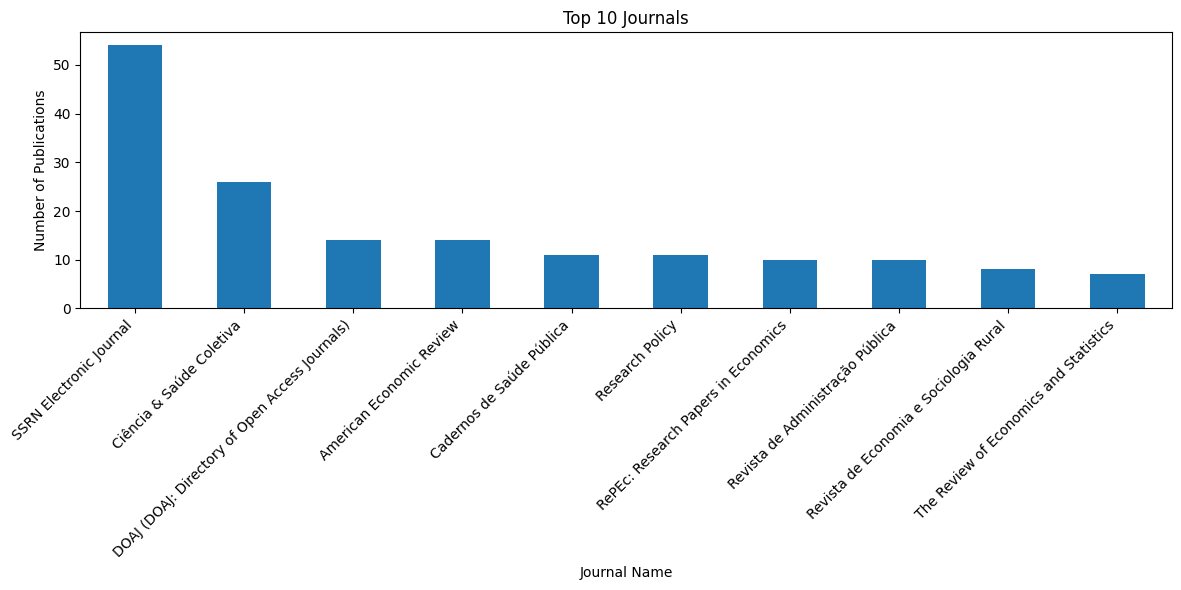

In [ ]:
top_10_journals = journals['journal_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
top_10_journals.plot(kind='bar')
plt.title('Top 10 Journals')
plt.xlabel('Journal Name')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

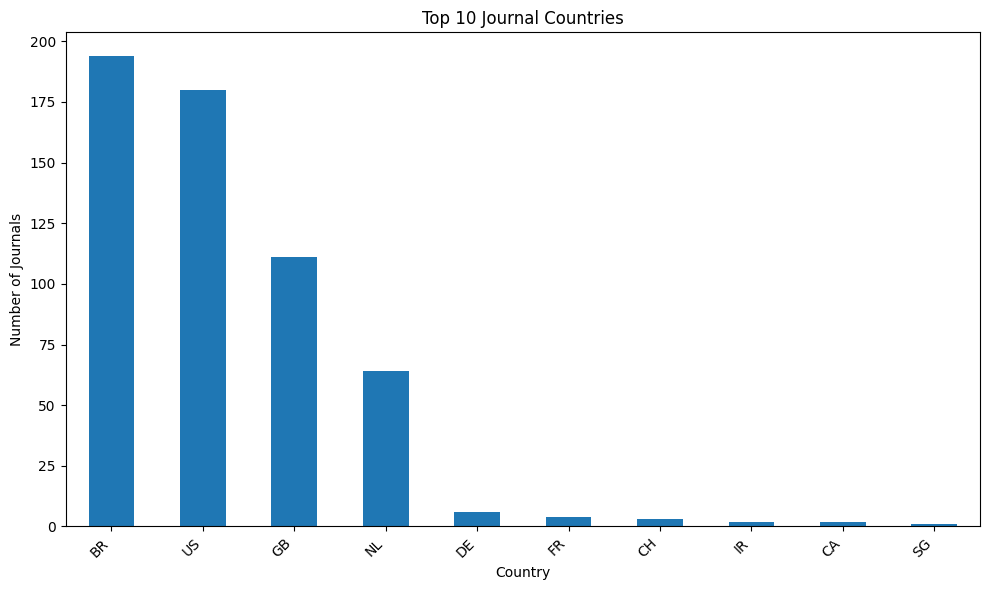

In [ ]:
top_10_journal_countries = journals['journal_country'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
top_10_journal_countries.plot(kind='bar')
plt.title('Top 10 Journal Countries')
plt.xlabel('Country')
plt.ylabel('Number of Journals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

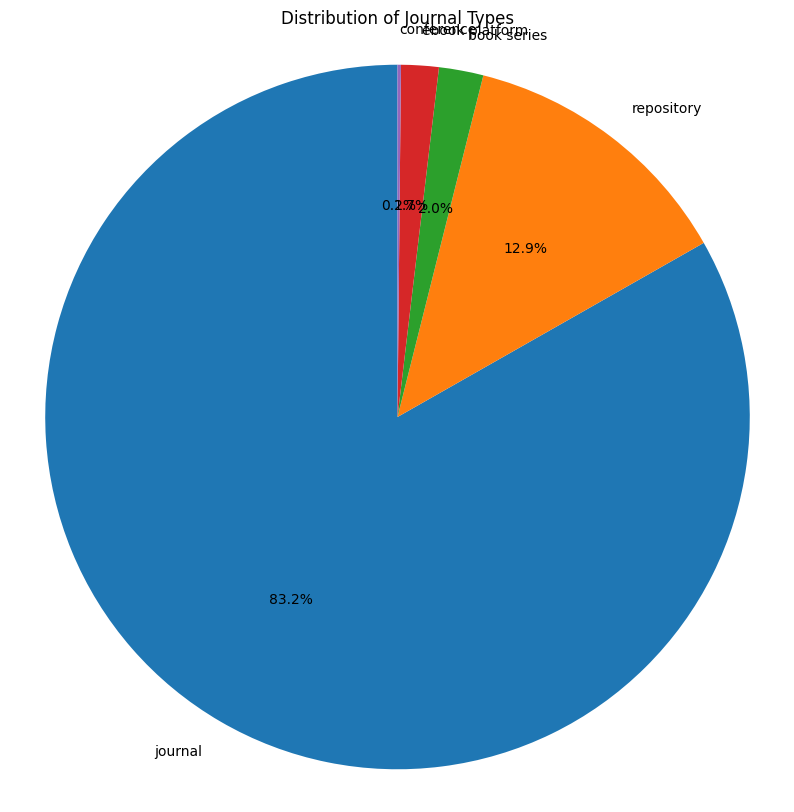

In [ ]:
journal_types = journals['journal_type'].value_counts()

plt.figure(figsize=(10, 10))
journal_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Journal Types')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [ ]:
%%bigquery ref_age --project=insyspo

SELECT a.work_id, a.doi, a.file, b.ano AS policy_year, c.publication_year AS paper_year, CAST(b.ano - c.publication_year AS INT64) AS year_diff
FROM insyspo.projectdb_ipea_documents.matches AS a
JOIN insyspo.projectdb_ipea_documents.metadata AS b ON a.file = b.arquivo
JOIN insyspo.publicdb_openalex_2024_10_rm.works AS c ON a.work_id = c.id

Query is running:   0%|          |

Downloading:   0%|          |

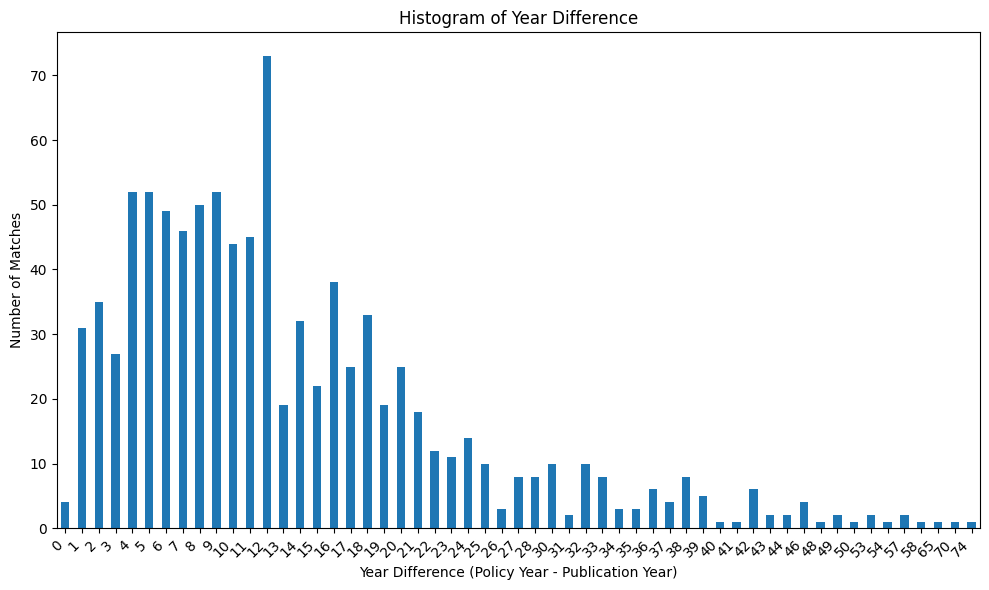

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ref_age['year_diff'].value_counts().sort_index().plot(kind='bar')
plt.title('Histogram of Year Difference')
plt.xlabel('Year Difference (Policy Year - Publication Year)')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
average_year_diff_per_file = ref_age.groupby('file')['year_diff'].mean()

average_year_diff_per_file

,year_diff
file,
/content/drive/My Drive/Colaboração/Information from texts/Texts/A_Politica_de_expansao_cap07.pdf,22.333333
/content/drive/My Drive/Colaboração/Information from texts/Texts/NT_113_Diset_Gastos_Tributarios.pdf,10.5
/content/drive/My Drive/Colaboração/Information from texts/Texts/NT_50_Diest_ElementosConceituais.pdf,8.5
/content/drive/My Drive/Colaboração/Information from texts/Texts/NT_57_Dinte_Politicas_Industriais.pdf,10.636364
/content/drive/My Drive/Colaboração/Information from texts/Texts/NT_Gastos_tributarios_PD_Brasil_Publicacao_Preliminar.pdf,24.0
/content/drive/My Drive/Colaboração/Information from texts/Texts/NT_Politicas_industriais_China_Publicacao_Preliminar.pdf,10.9375
/content/drive/My Drive/Colaboração/Information from texts/Texts/Outra_inovacao_e_possivel_cap09.pdf,11.0
/content/drive/My Drive/Colaboração/Information from texts/Texts/PPP_55.pdf,13.797619
/content/drive/My Drive/Colaboração/Information from texts/Texts/PPP_55_Analise.pdf,18.0
